In [125]:
import pandas as pd
import numpy as np
from math import log
import matplotlib.pyplot as plt

In [126]:
# чтение датасета из файла
data = pd.read_csv("resources/student_performance.csv")

In [127]:
# показать первые 5 строк
data.head()

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_predicted,performance_index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [128]:
# extracurricular_activities необходимо привести к числовому виду
data['extracurricular_activities'] = data['extracurricular_activities'].map({'Yes': 1, 'No': 0})

In [129]:
# показать информацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   hours_studied                     10000 non-null  int64  
 1   previous_scores                   10000 non-null  int64  
 2   extracurricular_activities        10000 non-null  int64  
 3   sleep_hours                       10000 non-null  int64  
 4   sample_question_papers_predicted  10000 non-null  int64  
 5   performance_index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


Пустых значений нет.

In [130]:
# получение статистики датасета (исключая колонку Extracurricular Activities)
data.describe()

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_predicted,performance_index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


- count - количество элементов
- mean - среднее значение
- std - стандартное отклонение
- min - минимальное значение
- 25%/50%/75% - квантили
- max - максимальное значение

In [131]:
# отделение зависимой колонки
X = data.drop(columns='performance_index')
y = data['performance_index']

In [132]:
# получение параметров для построения графиков
rows_count = X.shape[0]
cols_count = X.shape[1]
means = data.mean()
corrected_dispersions = np.sum(np.power(data - means, 2), axis=0) / (rows_count - 1)
standard_offsets = np.sqrt(corrected_dispersions)
mins = data.min()
maxs = data.max()

C:\Users\hopsb\AppData\Local\Temp\ipykernel_21208\3921445674.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot([means[i], means[i]], [0, np.max(hist[0])], color="red")
C:\Users\hopsb\AppData\Local\Temp\ipykernel_21208\3921445674.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.plot([means[i] - standard_offsets[i], means[i] - standard_offsets[i]], [0, np.max(hist[0])], color="orange")
C:\Users\hopsb\AppData\Local\Temp\ipykernel_21208\3921445674.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consist

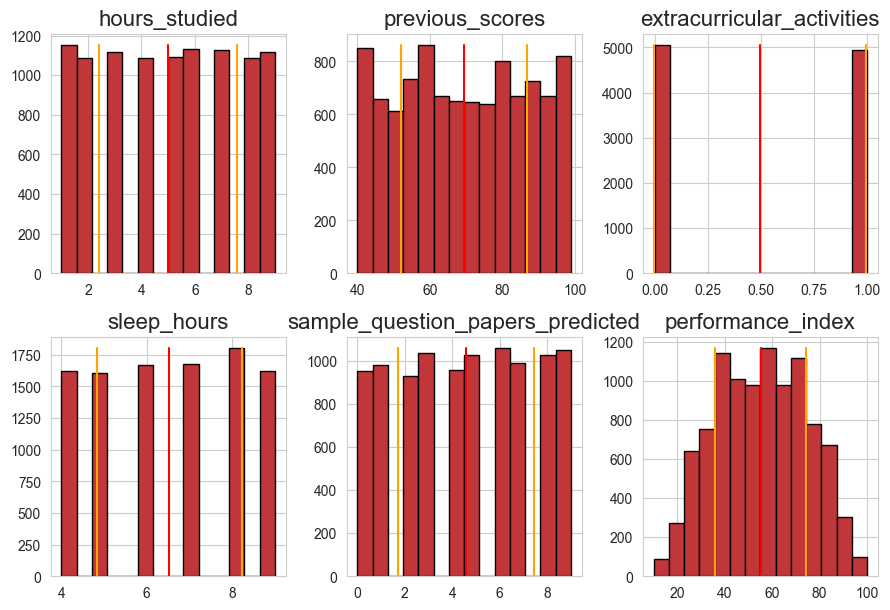

In [133]:
# построение графиков
bins_count = 1 + int(log(rows_count, 2))
data_from = X.join(y)
titles = data_from.columns
fig = plt.figure(figsize=(9, 9))

for i, column in enumerate(titles):
    ax = fig.add_subplot(3, 3, i + 1)
    hist = ax.hist(data_from[column], bins=bins_count, edgecolor="black")
    ax.plot([means[i], means[i]], [0, np.max(hist[0])], color="red")
    ax.plot([means[i] - standard_offsets[i], means[i] - standard_offsets[i]], [0, np.max(hist[0])], color="orange")
    ax.plot([means[i] + standard_offsets[i], means[i] + standard_offsets[i]], [0, np.max(hist[0])], color="orange")
    ax.set_title(titles[i], fontsize=16)

fig.tight_layout()
plt.show()

In [134]:
# функция для нормирования датасета
def normalize(df):
    df_normal = df.copy()
    for col in df.columns:
        mean = df_normal[col].mean()
        std = df_normal[col].std()
        df_normal[col] = (df_normal[col] - mean) / std
    return df_normal

In [135]:
# функция для разделения датасета на обучающий и тестовый наборы данных
def train_test_split(x, y):
    split_index = int(0.75 * len(X))
    x_train = x.iloc[:split_index].reset_index(drop=True)
    x_test = x.iloc[split_index:].reset_index(drop=True)
    y_train = y.iloc[:split_index].reset_index(drop=True)
    y_test = y.iloc[split_index:].reset_index(drop=True)
    return x_train, x_test, y_train, y_test

In [136]:
# нормировка и разделение на обучающие и тестовые данные
data_normal = normalize(data)
x = data_normal.drop(columns='performance_index')
y = data_normal['performance_index']
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [137]:
# функция линейной регрессии
def linear_regression(x, y):
    x = np.c_[np.ones(x.shape[0]), x]
    # (X.T * X)^(-1) * X.T * y
    weights = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
    bias = weights[0]
    weights = weights[1:]
    return weights, bias

In [138]:
# функция подсчёта коэффициента детерминации
def determination(y_true, y_pred):
    if len(y_true) > len(y_pred):
        raise Exception("len(y_true) <= len(y_pred) expected")
    n = len(y_true)
    mean = sum(y_true) / n
    return 1 - sum([(y_true[i] - y_pred[i]) ** 2 for i in range(n)]) / sum([(y_true[i] - mean) ** 2 for i in range(n)])

In [139]:
# функция оценки модели
def evaluate_model(weights, bias, x, y):
    y_pred = np.dot(x, weights) + bias
    det = determination(y, y_pred)
    return det

In [140]:
# модель 1
x_train_m1 = x_train.copy()
x_test_m1 = x_test.copy()
weights1, bias1 = linear_regression(x_train_m1.values, y_train.values)
y_pred_m1 = np.dot(x_test_m1.values, weights1) + bias1
det_m1 = evaluate_model(weights1, bias1, x_test_m1.values, y_test)
print(f"Коэф-т детерминации для Модели 1: {det_m1}")

Коэф-т детерминации для Модели 1: 0.9884692770540272


In [141]:
# модель 2 (удалили параметр extracurricular_activities)
x_train_m2 = x_train.copy().drop(columns='extracurricular_activities')
x_test_m2 = x_test.copy().drop(columns='extracurricular_activities')
weights2, bias2 = linear_regression(x_train_m2.values, y_train.values)
y_pred_m2 = np.dot(x_test_m2.values, weights2) + bias2
det_m2 = evaluate_model(weights2, bias2, x_test_m2.values, y_test)
print(f"Коэф-т детерминации для Модели 2: {det_m2}")

Коэф-т детерминации для Модели 2: 0.9883270881966559


In [142]:
# модель 3 (бонусное задание с синтаксическим признаком)
x_train_m3 = x_train.copy()
x_test_m3 = x_test.copy()
# study_sleep_ratio - отношение параметров hours_studied и sleep_hours
x_train_m3['study_sleep_ratio'] = x_train_m3['hours_studied'] / x_train_m3['sleep_hours']
x_test_m3['study_sleep_ratio'] = x_test_m3['hours_studied'] / x_test_m3['sleep_hours']
weights3, bias3 = linear_regression(x_train_m3.values, y_train.values)
y_pred_m3 = np.dot(x_test_m3.values, weights3) + bias3
det_m3 = evaluate_model(weights3, bias3, x_test_m3.values, y_test)
print(f"Коэф-т детерминации для Модели 3: {det_m3}")

Коэф-т детерминации для Модели 3: 0.9884718729386256


In [143]:
# вывод коэффициентов модели 1
result1 = np.insert(weights1, 0, bias1)
col_names1 = ['a', 'hours_studied', 'previous_scores', 'extracurricular_activities', 'sleep_hours', 'sample_question_papers_predicted']
df1 = pd.DataFrame([result1], columns=col_names1)
print(df1)

          a  hours_studied  previous_scores  extracurricular_activities  \
0 -0.000922       0.384685         0.919327                    0.017035   

   sleep_hours  sample_question_papers_predicted  
0     0.041775                          0.028908  


In [144]:
# вывод коэффициентов модели 2
result2 = np.insert(weights2, 0, bias2)
col_names2 = ['a', 'hours_studied', 'previous_scores', 'sleep_hours', 'sample_question_papers_predicted']
df2 = pd.DataFrame([result2], columns=col_names2)
print(df2)

          a  hours_studied  previous_scores  sleep_hours  \
0 -0.001058       0.384718           0.9194     0.041591   

   sample_question_papers_predicted  
0                          0.029137  


In [145]:
# вывод коэффициентов модели 3
result3 = np.insert(weights3, 0, bias3)
col_names3 = ['a', 'hours_studied', 'previous_scores', 'extracurricular_activities', 'sleep_hours', 'sample_question_papers_predicted', 'study_sleep_ratio']
df3 = pd.DataFrame([result3], columns=col_names3)
print(df3)

          a  hours_studied  previous_scores  extracurricular_activities  \
0 -0.000922       0.384646          0.91933                    0.017037   

   sleep_hours  sample_question_papers_predicted  study_sleep_ratio  
0     0.041776                          0.028918            0.00028  
